## Code Dump for the project

Valid code goes into other files, this is just an exploration and testing ground

### Data Context

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders
<br>
### Column Information
<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above) <br>
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above) <br>
PAY_5: Repayment status in May, 2005 (scale same as above) <br> 
PAY_6: Repayment status in April, 2005 (scale same as above) <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [52]:
# Preprocessing

credit_data = pd.read_csv('data/credit_default_data.csv')

col_pay_status = []
col_bill_status = []
col_prev_pay_amount = []

for index, row in credit_data.iterrows():
    pay_status = [row['PAY_0'], row['PAY_2'], row['PAY_3'], row['PAY_4'], row['PAY_5'], row['PAY_6']]
    bill_status = [row['BILL_AMT1'], row['BILL_AMT2'], row['BILL_AMT3'], row['BILL_AMT4'], row['BILL_AMT5'], row['BILL_AMT6']]
    prev_pay_amount = [row['PAY_AMT1'], row['PAY_AMT2'], row['PAY_AMT3'], row['PAY_AMT4'], row['PAY_AMT5'], row['PAY_AMT6']]

    pay_status.reverse()
    bill_status.reverse()
    prev_pay_amount.reverse()
    
    col_pay_status.append(pay_status)
    col_bill_status.append(bill_status)
    col_prev_pay_amount.append(prev_pay_amount)

credit_data_listed = credit_data.copy()

cols_to_drop = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
credit_data_listed['pay_status'] = col_pay_status
credit_data_listed['amt_bill_statement'] = col_bill_status
credit_data_listed['prev_pay_amount'] = col_prev_pay_amount
credit_data_listed = credit_data_listed.drop(cols_to_drop, axis=1)
credit_data_listed.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,pay_status,amt_bill_statement,prev_pay_amount
0,1,20000,F,University,Married,24,Y,"[-2, -2, -1, -1, 2, 2]","[0, 0, 0, 689, 3102, 3913]","[0, 0, 0, 0, 689, 0]"
1,2,120000,F,University,Single,26,Y,"[2, 0, 0, 0, 2, -1]","[3261, 3455, 3272, 2682, 1725, 2682]","[2000, 0, 1000, 1000, 1000, 0]"
2,3,90000,F,University,Single,34,N,"[0, 0, 0, 0, 0, 0]","[15549, 14948, 14331, 13559, 14027, 29239]","[5000, 1000, 1000, 1000, 1500, 1518]"
3,4,50000,F,University,Married,37,N,"[0, 0, 0, 0, 0, 0]","[29547, 28959, 28314, 49291, 48233, 46990]","[1000, 1069, 1100, 1200, 2019, 2000]"
4,5,50000,M,University,Married,57,N,"[0, 0, 0, -1, 0, -1]","[19131, 19146, 20940, 35835, 5670, 8617]","[679, 689, 9000, 10000, 36681, 2000]"


In [53]:
# One Hot Encoding

credit_data = pd.get_dummies(credit_data, columns=['SEX', 'EDUCATION', 'MARRIAGE'])
credit_data.head()


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_0,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,False,False,False,False,True,False,False,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,False,False,False,False,True,False,False,False,False,True
2,3,90000,34,0,0,0,0,0,0,29239,...,False,False,False,False,True,False,False,False,False,True
3,4,50000,37,0,0,0,0,0,0,46990,...,False,False,False,False,True,False,False,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,False,False,False,False,True,False,False,True,False,False


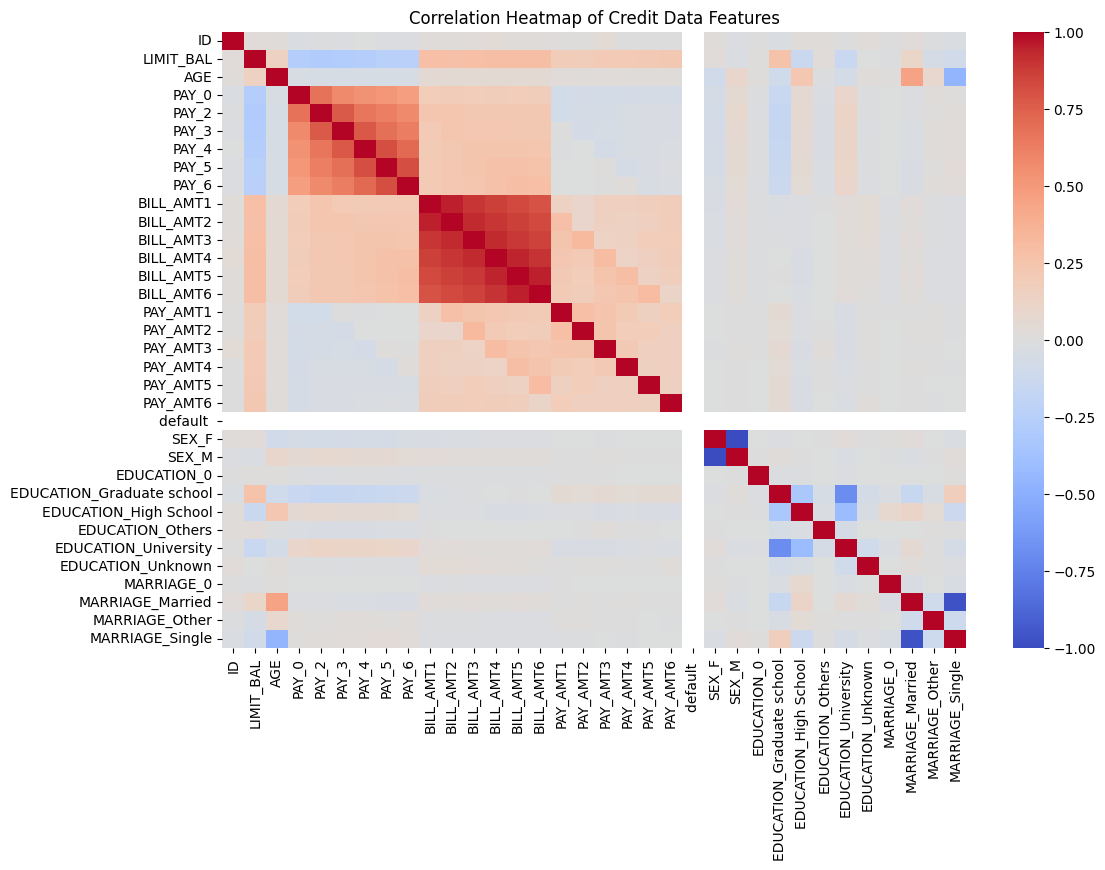

In [38]:
# Feature Selection

# education_mapping = {
#     'Graduate School': 1,
#     'University': 2,
#     'High School': 3,
#     'Others': 4
# }
# sex_mapping = {
#     'Male': 1,
#     'Female': 0
# }
# marriage_mapping = {
#     'Married': 1,
#     'Single': 0,
#     'Others': 2
# }
default_mapping = {
    'Y': 1,
    'N': 0
}
# credit_data['EDUCATION'] = credit_data['EDUCATION'].map(education_mapping)
# credit_data['SEX'] = credit_data['SEX'].map(sex_mapping)
# credit_data['MARRIAGE'] = credit_data['MARRIAGE'].map(marriage_mapping)
credit_data['default '] = credit_data['default '].map(default_mapping)

corr_matrix = credit_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Credit Data Features')
plt.show()

# Feature Scaling




T-test Statistic: 95786286.5
P-value: 1.2255485818223303e-189


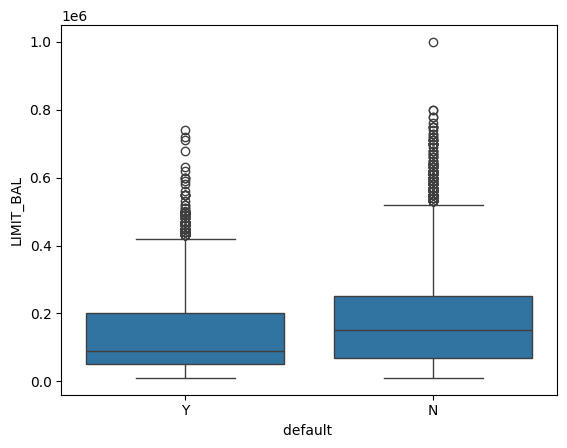

In [60]:
# Bill statements appear heavily correlated, but makes sense since when you can't pay off a bill you get
# the same bill in the next month. Cannot remove these features anyway as they carry time relevance.
# We will remove ID. It is not necessary for the model to know the ID of the customer.

# Check if LIMIT_BAL has any effect on default

sns.boxplot(data=credit_data, x='default ', y='LIMIT_BAL')

# Check distributions using wilcoxon test

from scipy.stats import mannwhitneyu
stats, p = mannwhitneyu(credit_data['LIMIT_BAL'][credit_data['default '] == 'N'], credit_data['LIMIT_BAL'][credit_data['default '] == 'Y'])
print(f"T-test Statistic: {stats}")
print(f"P-value: {p}")


'N' class has a wider and slightly higher distribution. High T-stat so distributions have large difference in means. Low p-value so null hypothesis <br>
of 'same distribution' is rejected. Not enough evidence to consider LIMIT_BAL variable as having no effect on default, but interaction does not look strong.

In [62]:
# Feature selection

predictors = credit_data.drop(columns=['ID', 'default '])
target = credit_data['default '].map({'Y': 1, 'N': 0})

# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Normalise data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model

from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_scaled, y_train)

X_pred = model.predict(X_test_scaled)

# Evaluate model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, X_pred)

conf_mat = confusion_matrix(y_test, X_pred)
print("Overall Accuracy Insample: ", accuracy)
print("Confusion Matrix:")
print(conf_mat)


Overall Accuracy Insample:  0.8125
Confusion Matrix:
[[4406  281]
 [ 844  469]]


Baseline performance defined. Now for further modifications to increase accuracy.